In [1]:

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "GWDC201805DATA3-Class-Repository-DATA/Homework/05-Matplotlib/Instructions/Pyber/data/city_data.csv"
ride_data_to_load = "GWDC201805DATA3-Class-Repository-DATA/Homework/05-Matplotlib/Instructions/Pyber/data/ride_data.csv"

# Read the City and Ride Data
city_data_df=pd.read_csv(city_data_to_load)

ride_data_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset


original_merged_table=pd.merge(ride_data_df,city_data_df)

# Display the data table for preview

original_merged_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# we create a new table grouped by city type and driver count and count the number od rides in the city

new_table=original_merged_table.groupby(["city","type","driver_count"]).size().reset_index().rename(columns={0:"Number of ride"})
new_table.head()

,city,type,driver_count,Number of ride
0,Amandaburgh,Urban,12,18
1,Barajasview,Urban,26,22
2,Barronchester,Suburban,11,16
3,Bethanyland,Suburban,22,18
4,Bradshawfurt,Rural,7,10


In [3]:
city_group=original_merged_table.groupby("city")

y_axis_valu=city_group["fare"].mean()
y_axis_value=y_axis_valu.sort_index()
y_axis_value=pd.DataFrame(y_axis_value)
y_axis_value=y_axis_value.reset_index()
y_axis_value.head()

,city,fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [4]:
# create a new table which encorporates the necessary values for the bubble chart

created_table=pd.merge(new_table,y_axis_value)
created_table.head()

,city,type,driver_count,Number of ride,fare
0,Amandaburgh,Urban,12,18,24.641667
1,Barajasview,Urban,26,22,25.332273
2,Barronchester,Suburban,11,16,36.422500
3,Bethanyland,Suburban,22,18,32.956111
4,Bradshawfurt,Rural,7,10,40.064000


# Bubble Plot of Ride Sharing Data



Text(0.5,1,'Pyber Ride Sharing Data( 2016)')

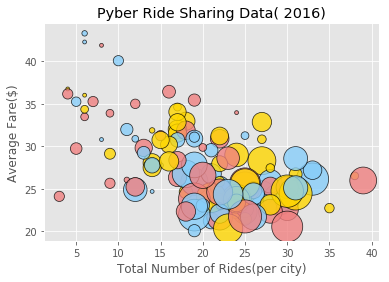

In [5]:
# create the bubble chart using teh newly created table

plt.style.use("ggplot")
fig, ax = plt.subplots()
my_scatter_plot=ax.scatter(
created_table["Number of ride"],  # x values
created_table["fare"], # y values
s= created_table["driver_count"]*15,
c= ["gold","lightskyblue","lightcoral"],

edgecolor="black",
linewidth=0.75,
alpha=0.80)

ax.set_xlabel("Total Number of Rides(per city)")
ax.set_ylabel("Average Fare($)")
ax.set_title("Pyber Ride Sharing Data( 2016)")



# Total Fares by City Type

In [6]:
# To produce pie_chart by city type
#we group the original csv read file by "type"

table_grouped_type=original_merged_table.groupby("type")


In [7]:

city_fare=table_grouped_type["fare"].sum()
city_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
# create a data frame and reset the index

total_fare=pd.DataFrame(city_fare)
totol_fare=total_fare.reset_index()
totol_fare


,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [9]:
#plot the pie chart

type_city=pd.Series(totol_fare["type"])
fare_city=pd.Series(totol_fare["fare"])
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

(-1.116703110300783,
 1.1972665181295887,
 -1.1123788195269562,
 1.1610996706073955)

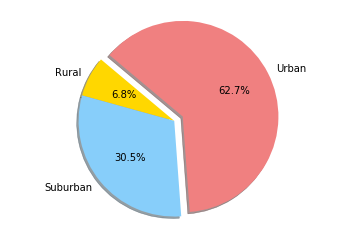

In [10]:
plt.pie(fare_city, labels=type_city,explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Total rides by the city type
   
    

In [11]:
# From the original merged table, count the values by type of city


ride_percity=original_merged_table["type"].value_counts()


In [12]:
# plot the pie chart

total_ridepercity=pd.DataFrame(ride_percity)
total_ridepercity=total_ridepercity.reset_index()
total_ridepercity

,index,type
0,Urban,1625
1,Suburban,625
2,Rural,125


In [13]:
typeof_city=pd.Series(total_ridepercity["index"])
typeby_city=pd.Series(total_ridepercity["type"])
colors =["lightcoral","lightskyblue","gold"]
explode = (0.1, 0, 0)

(-1.219489001286253,
 1.1107814820874242,
 -1.0969819671230163,
 1.1356402474823561)

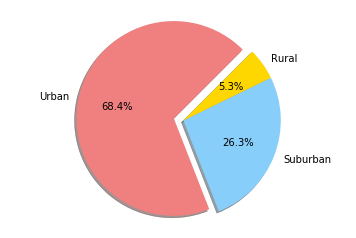

In [14]:
plt.pie(typeby_city, labels=typeof_city,explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")

# Total Drivers by City Type

In [15]:
# create a list gruped by type from the alreay created table to find the number of drivers 

dfa=new_table.groupby("type")

In [16]:
dfa_1=dfa["driver_count"].sum()


In [17]:
total_driver=pd.DataFrame(dfa_1)
driver_count=total_driver.reset_index()
driver_count

,type,driver_count
0,Rural,78
1,Suburban,490
2,Urban,2405


In [18]:
type_driver=pd.Series(driver_count["type"])
count_driver=pd.Series(driver_count["driver_count"])
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

([<matplotlib.patches.Wedge at 0x121798438>,
 [Text(-0.898001,0.635291,'Rural'),
  Text(-1.09987,0.0170476,'Suburban'),
  Text(1.19425,-0.117318,'Urban')],
 [Text(-0.489819,0.346522,'2.6%'),
  Text(-0.599928,0.00929867,'16.5%'),
  Text(0.696647,-0.0684356,'80.9%')])

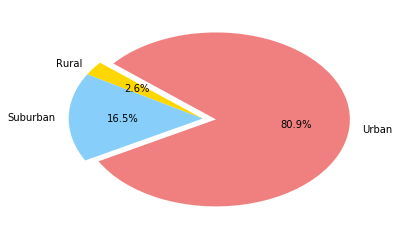

In [19]:
plt.pie(count_driver, labels=type_driver,explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
#plt.axis("equal")